In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai',context='notebook',ticks=True,grid=False)

import warnings
warnings.filterwarnings('ignore')

In [154]:
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

Assigned a customer segmentation project to maximize and support a marketing campaign, data of credit card is given below:

Goal: Clustering customer into groups for better targeting audiences 

### Group: 
Transcator: pay least interest, good with their finance, least lucrative sector

Revolvers: Use credit card as a loan, most lucrative sector

VIP: High credit limit and full paument, target to increase limit/spending

Newbie: New customer with low tenure who can targeted to enroll in other bank services


# EDA 

In [155]:
creditcard_df = pd.read_csv(r'/Users/dt/Unsuperviser learning/marketing_data.csv')

In [156]:
creditcard_df.shape

(8950, 18)

In [157]:
creditcard_df.sample(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1160,C11203,6.903243,0.727273,145.01,0.0,145.01,0.000000,0.750000,0.0,0.750000,0.000000,0,9,3000.0,162.930205,66.976840,0.142857,12
8427,C18654,1.707488,0.181818,32.04,0.0,32.04,0.000000,0.166667,0.0,0.083333,0.000000,0,2,2500.0,118.932111,150.600846,1.000000,12
8815,C19055,195.612750,0.888889,0.00,0.0,0.00,389.515222,0.000000,0.0,0.000000,0.333333,5,0,500.0,89.146808,124.573980,0.000000,9


In [158]:
ccmin = creditcard_df['BALANCE'].min()
ccmax = round(creditcard_df['BALANCE'].max())
ccavg = round(creditcard_df['BALANCE'].mean())
print("The mean of creditcard_df['BALANCE']is $",ccavg,'MIN: $',ccmin,'MAX: $',ccmax)

The mean of creditcard_df['BALANCE']is $ 1564 MIN: $ 0.0 MAX: $ 19043


In [159]:
# person who made max of ONE OFF PURCHASE
max_one_purchese = creditcard_df[creditcard_df['ONEOFF_PURCHASES']==creditcard_df['ONEOFF_PURCHASES'].max()]
max_one_purchese

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [160]:
# person who max cash advance transaction
max_CASH_ADVANCE = creditcard_df[creditcard_df['CASH_ADVANCE']==creditcard_df['CASH_ADVANCE'].max()]
print('Customer ID:',str(max_CASH_ADVANCE.CUST_ID))
print()
print('cash advance transcation:','$',int(max_CASH_ADVANCE['CASH_ADVANCE']));
print()
print('num of cash advance transcation',int(max_CASH_ADVANCE['CASH_ADVANCE_TRX']))
print()
print('num of pay in full',int(max_CASH_ADVANCE['PRC_FULL_PAYMENT']))

Customer ID: 2159    C12226
Name: CUST_ID, dtype: object

cash advance transcation: $ 47137

num of cash advance transcation 123

num of pay in full 0


<Axes: >

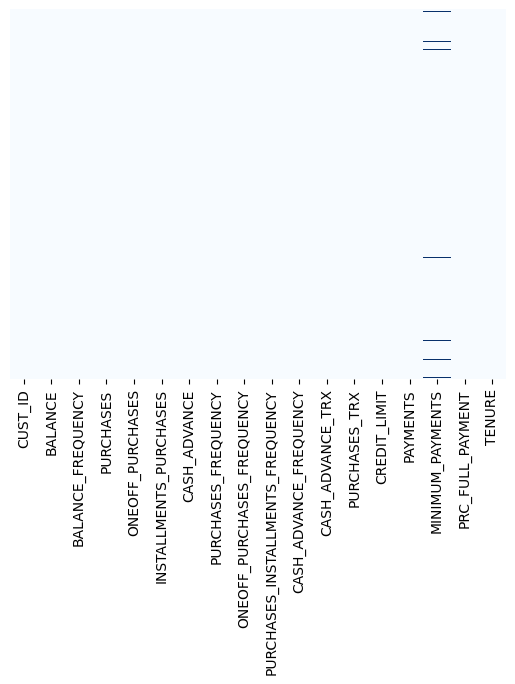

In [161]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [162]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [163]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df.pop('CUST_ID')

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [164]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [165]:
creditcard_df.duplicated().sum()

0

In [166]:
creditcard_df.columns
creditcard_df.shape

(8950, 17)

# KDE plot

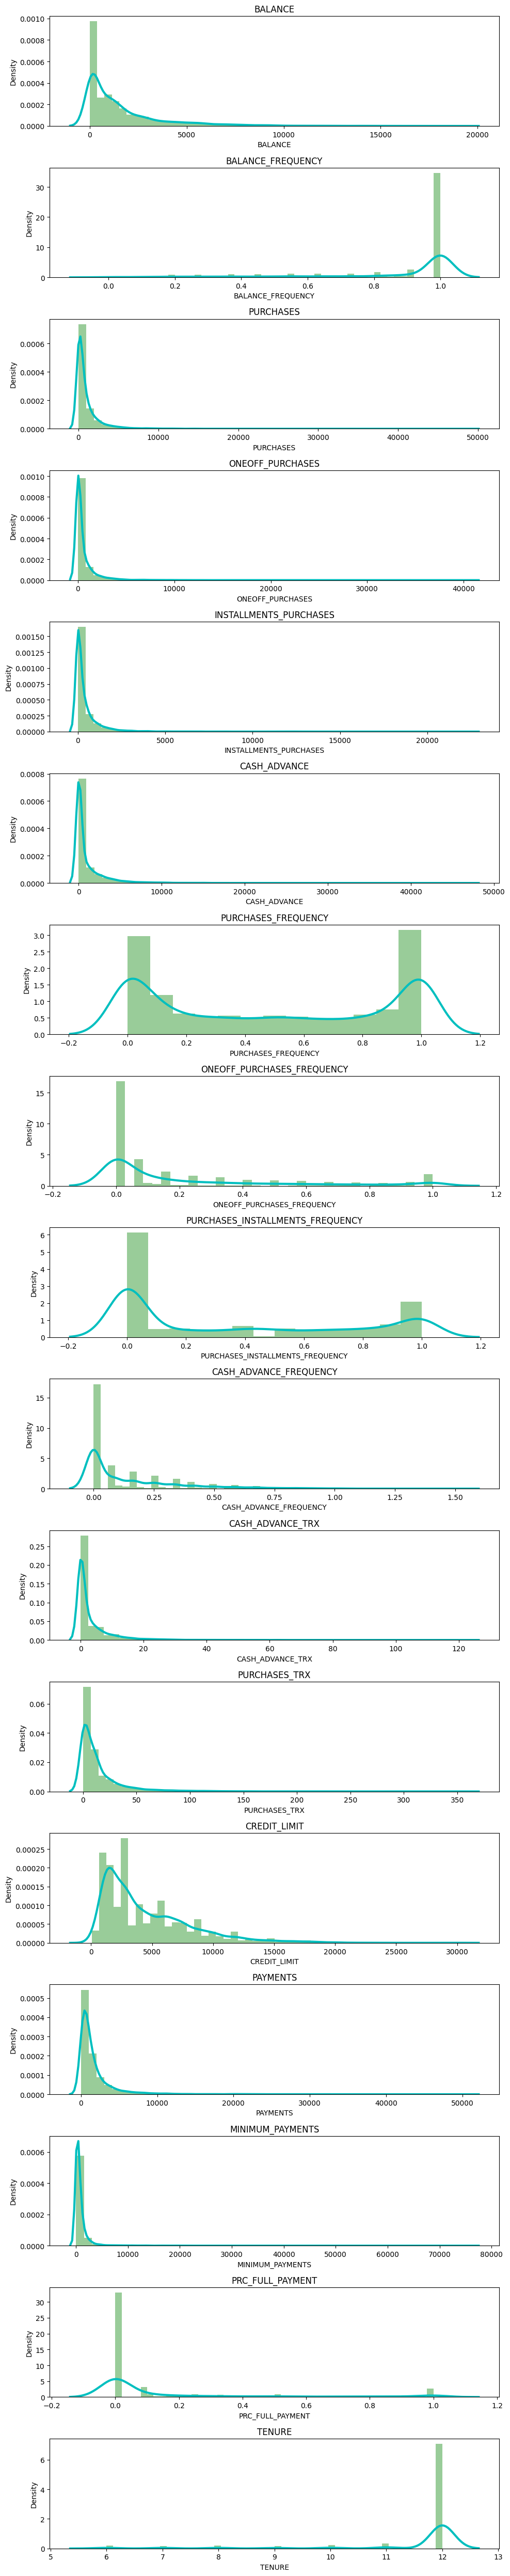

In [167]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "c", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

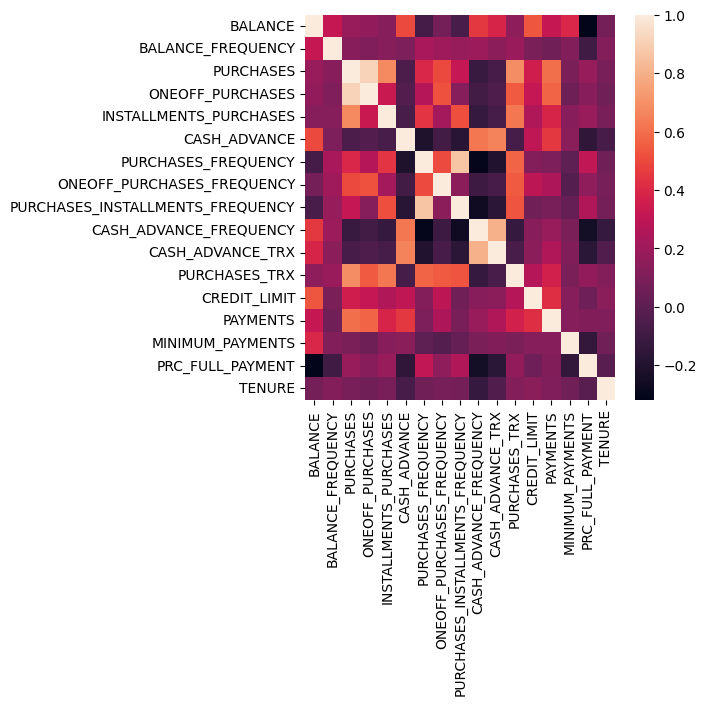

In [168]:
plt.figure(figsize = (5,5))
sns.heatmap(creditcard_df.corr())
plt.show()

In [169]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [170]:
creditcard_df.shape

(8950, 17)

In [171]:
creditcard_df_scaled.shape

(8950, 17)

In [172]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# Elbow method (getting the right cluster) 

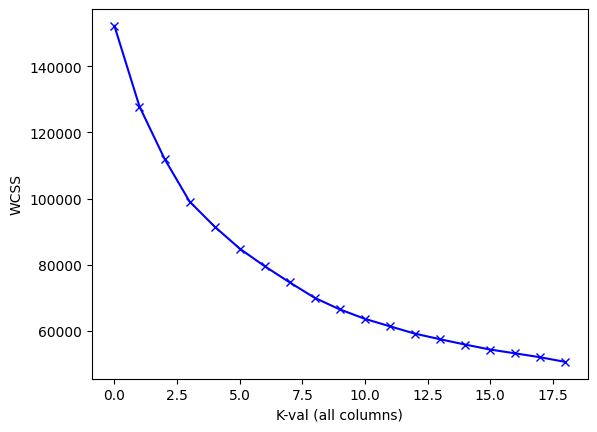

In [173]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
plt.xlabel('K-val (all columns)')
plt.ylabel('WCSS')
plt.plot(scores_1,'bx-')

#optimal num = 10 if all col is used

# Elbow method 2 (7 features only)

Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells.

In [174]:
s = creditcard_df_scaled[:,:7]
s.shape

(8950, 7)

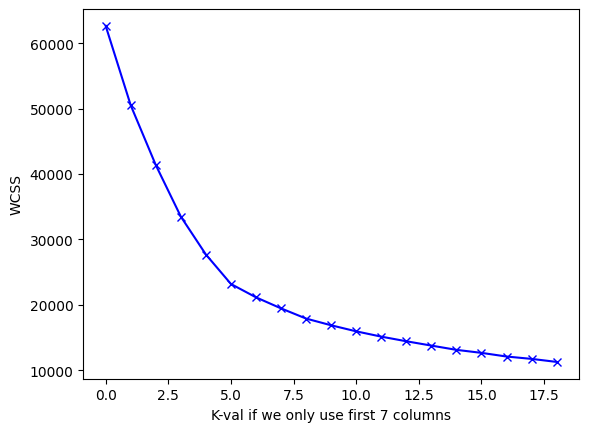

In [175]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(s)
    scores_1.append(kmeans.inertia_)
plt.xlabel('K-val if we only use first 7 columns')
plt.ylabel('WCSS')
plt.plot(scores_1,'bx-')

#optimal num = 8 if 5-7 col is used

# KMean 

In [176]:
kmeans = KMeans(4)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [177]:
kmeans.cluster_centers_.shape
# centroid for all of the diff cluster

(4, 17)

In [178]:
cluster_c = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_c

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
1,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
2,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
3,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146


In [179]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_c = scaler.inverse_transform(cluster_c)
cluster_c = pd.DataFrame(data = cluster_c, columns = [creditcard_df.columns])
cluster_c

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


In [180]:
labels.shape

(8950,)

In [181]:
labels.max()

3

In [182]:
labels.min()

0

In [183]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

# now we can use thsese to classify our customer

array([0, 3, 1, ..., 1, 0, 0], dtype=int32)

In [198]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


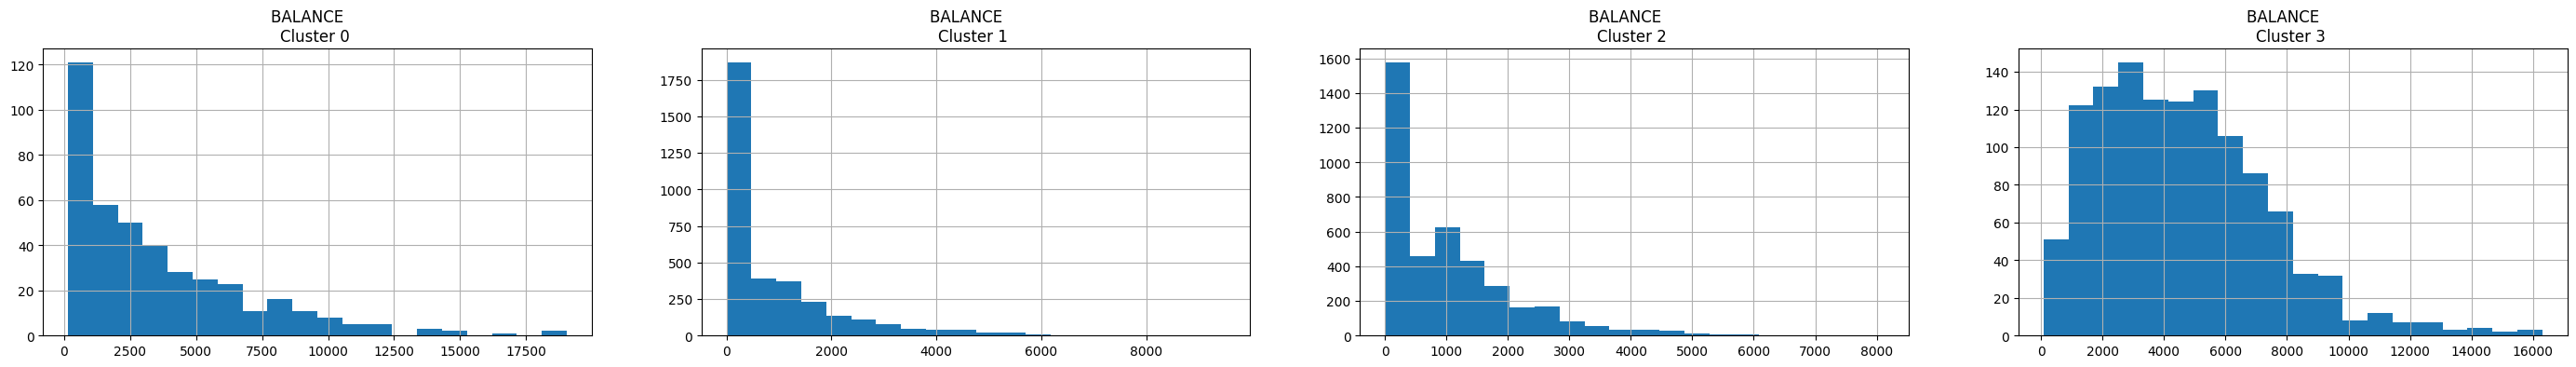

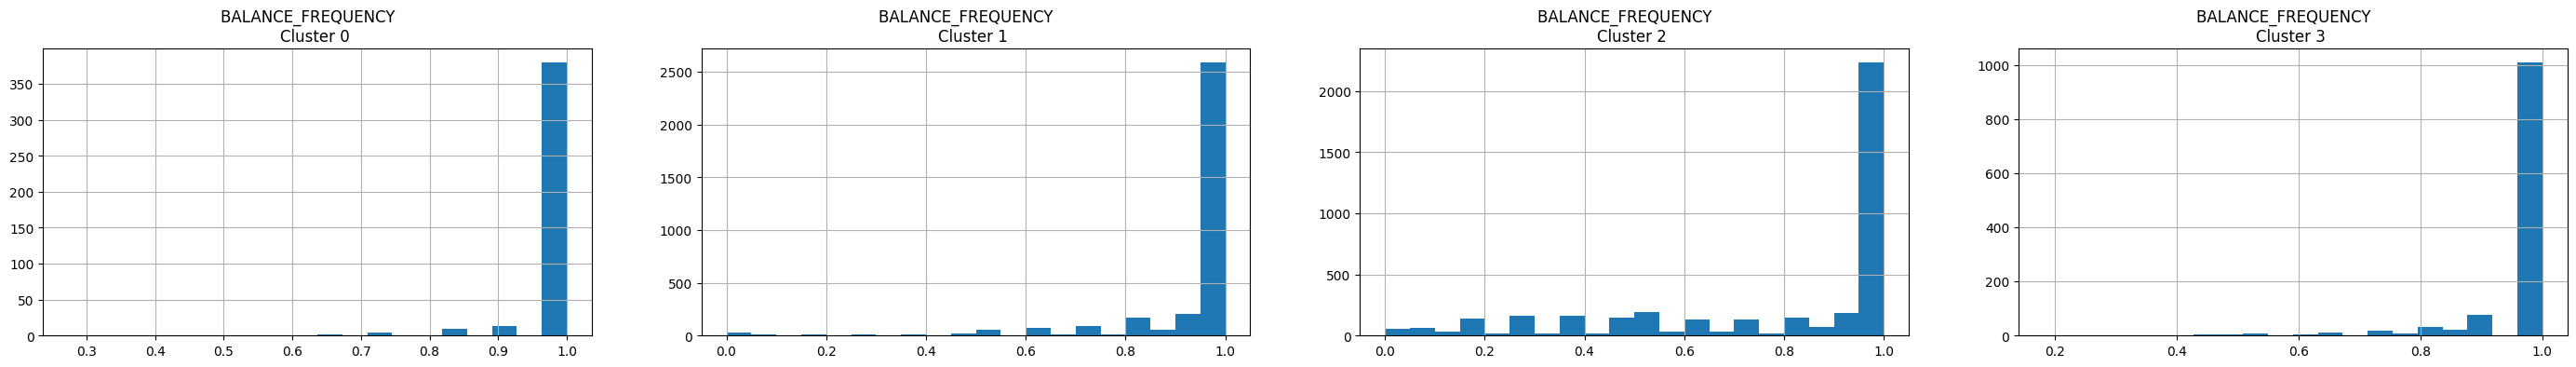

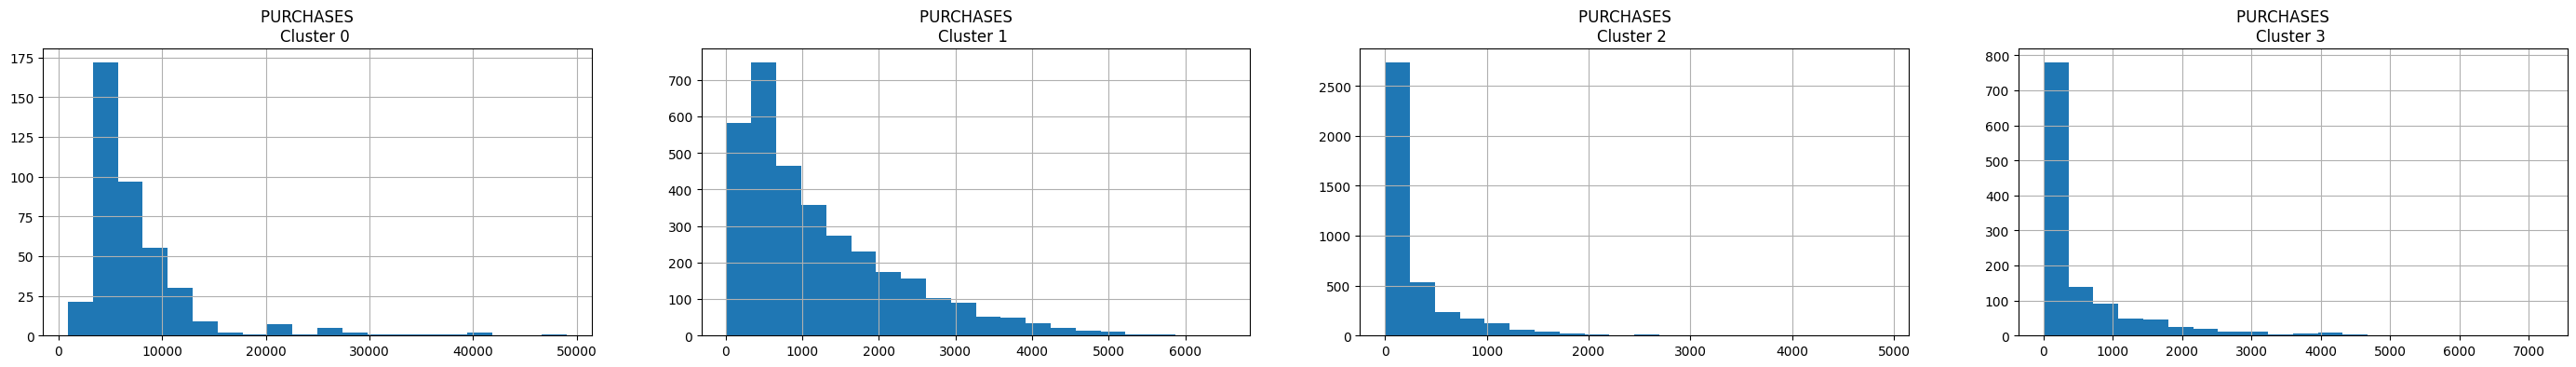

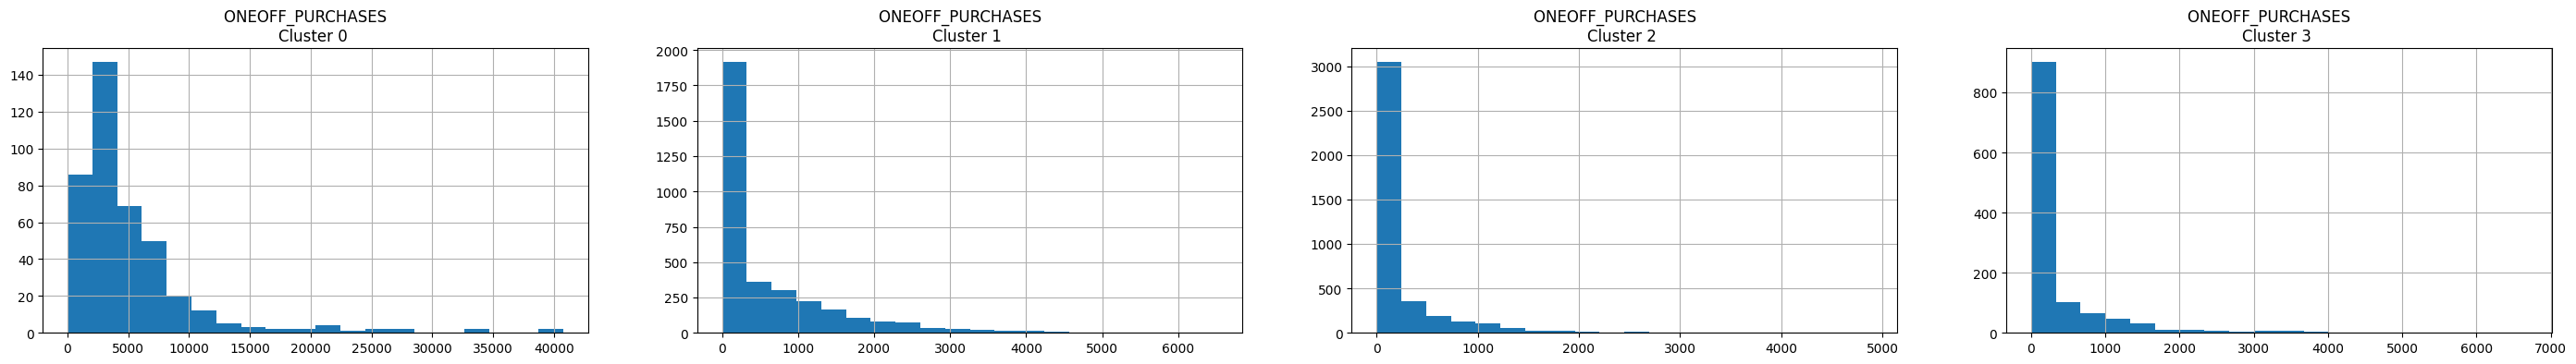

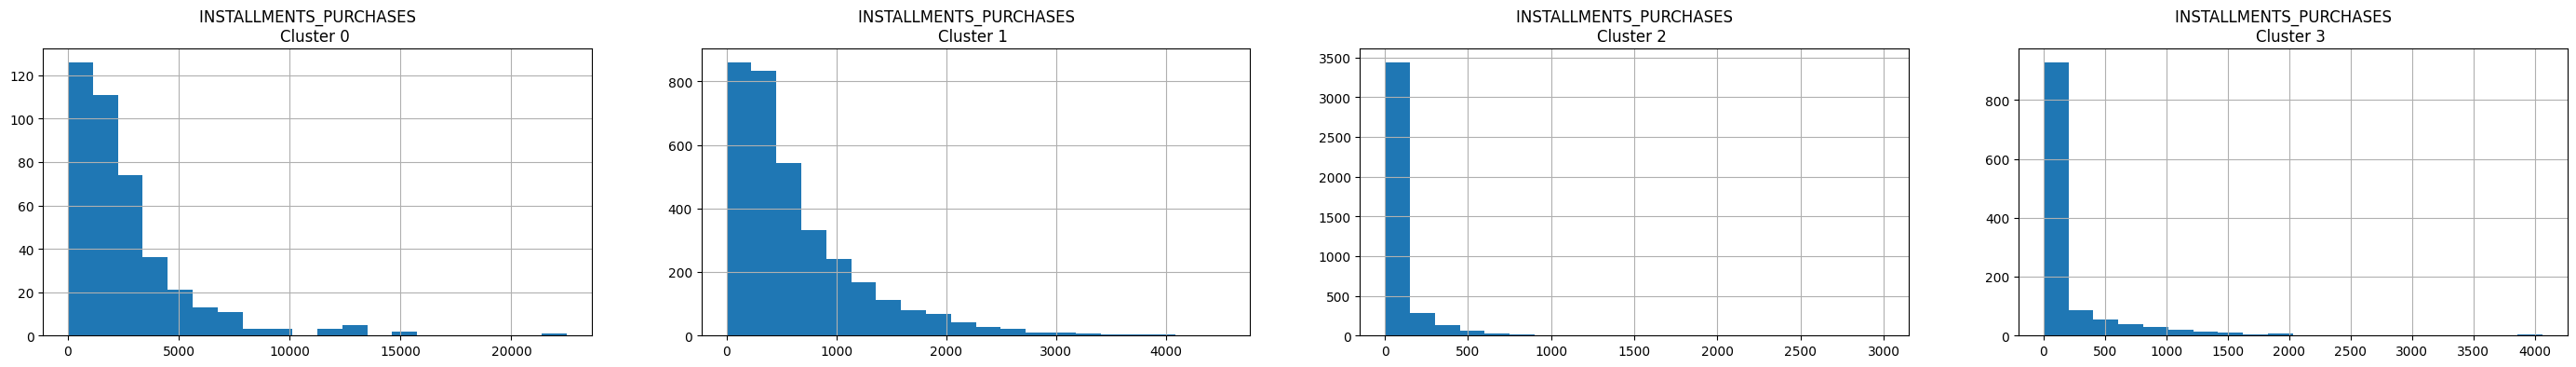

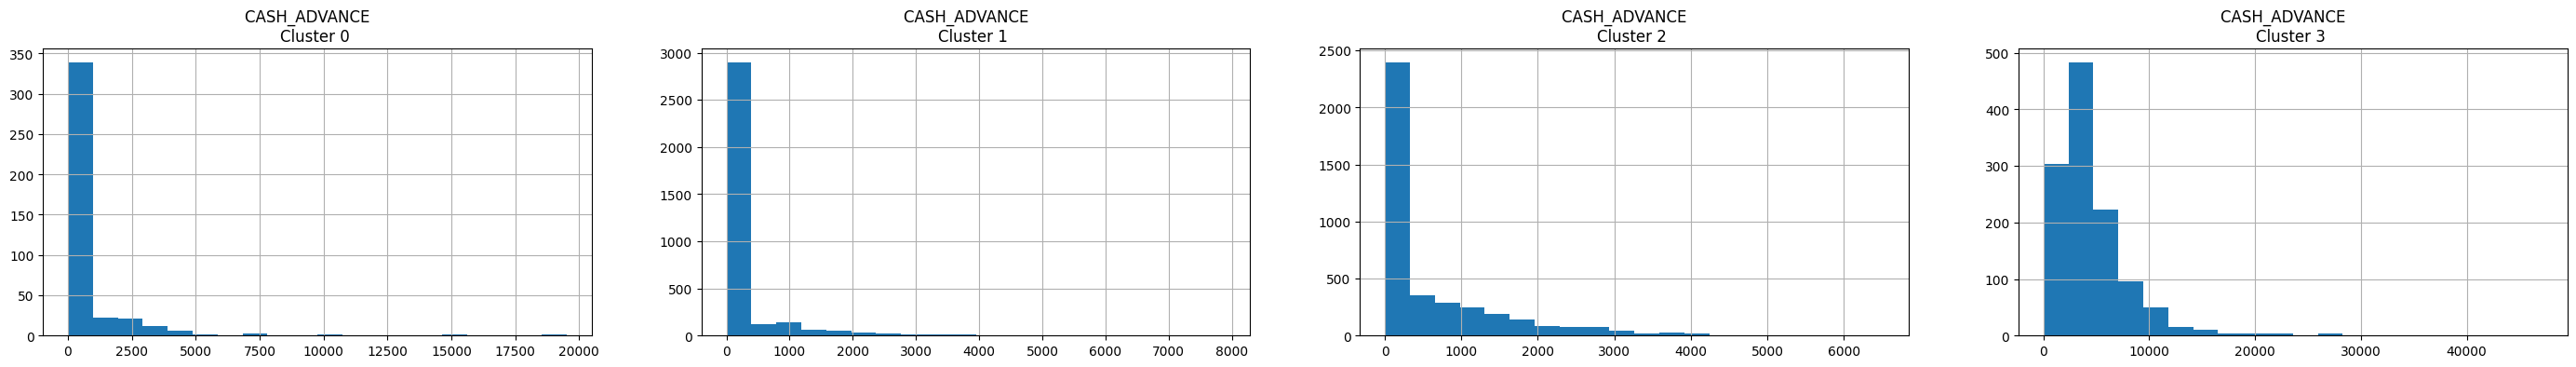

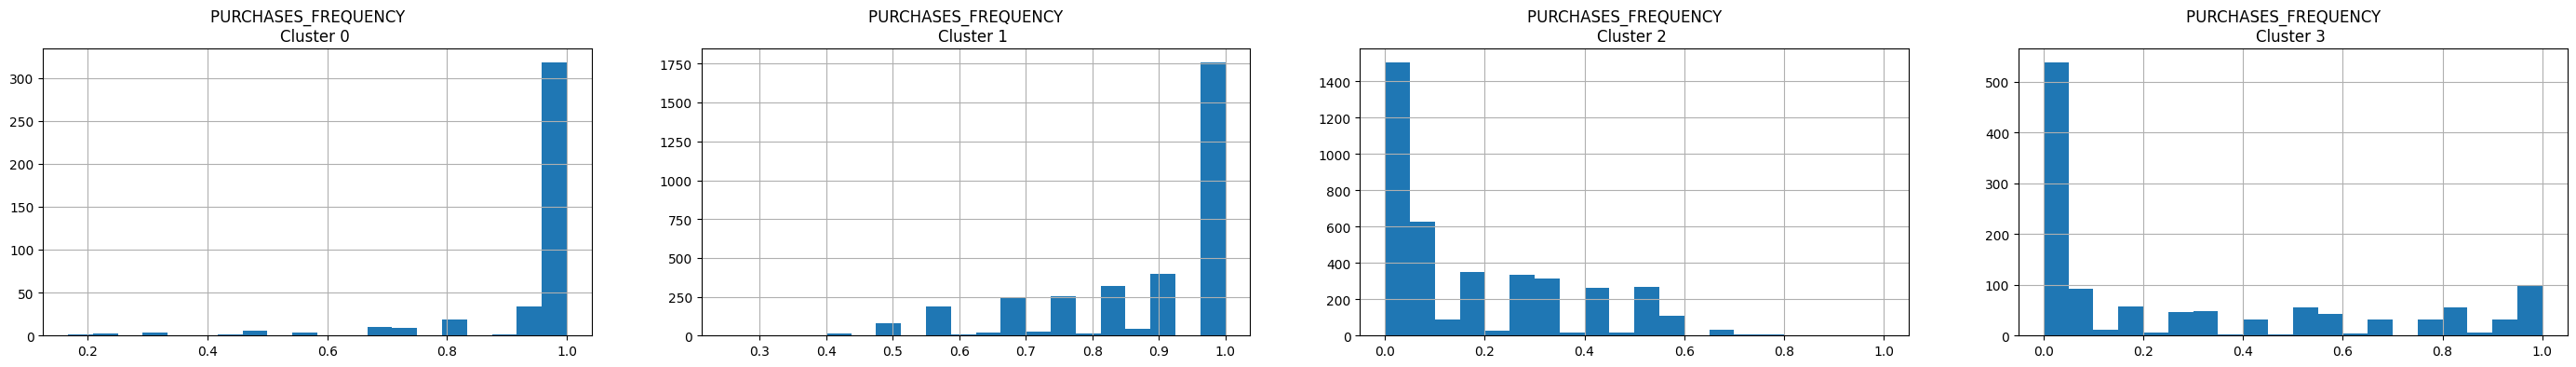

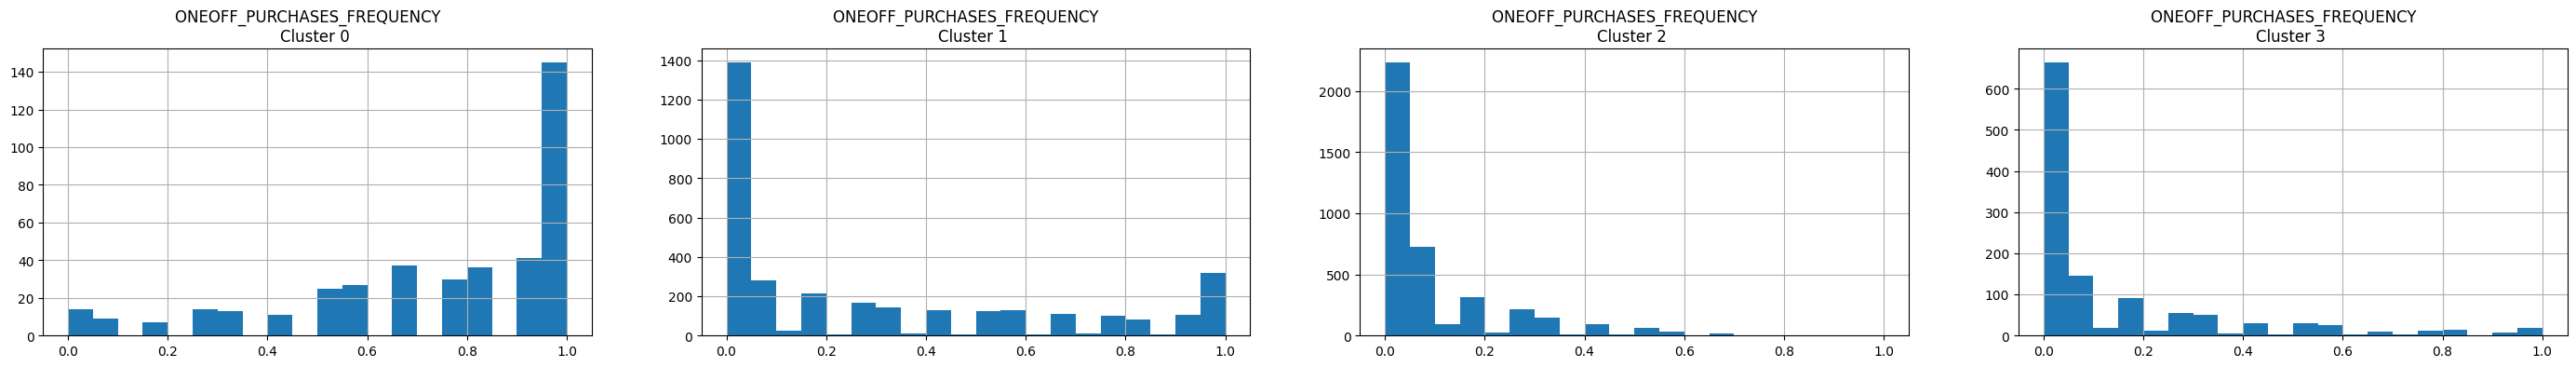

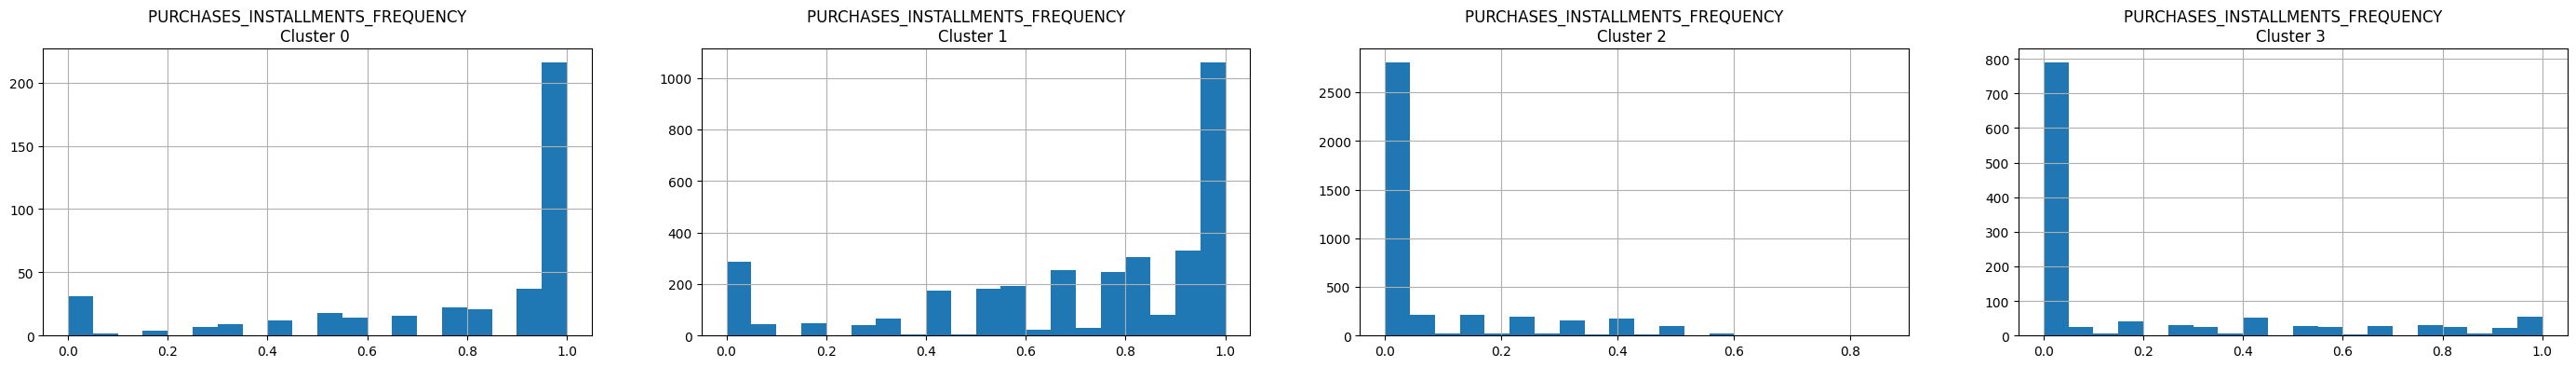

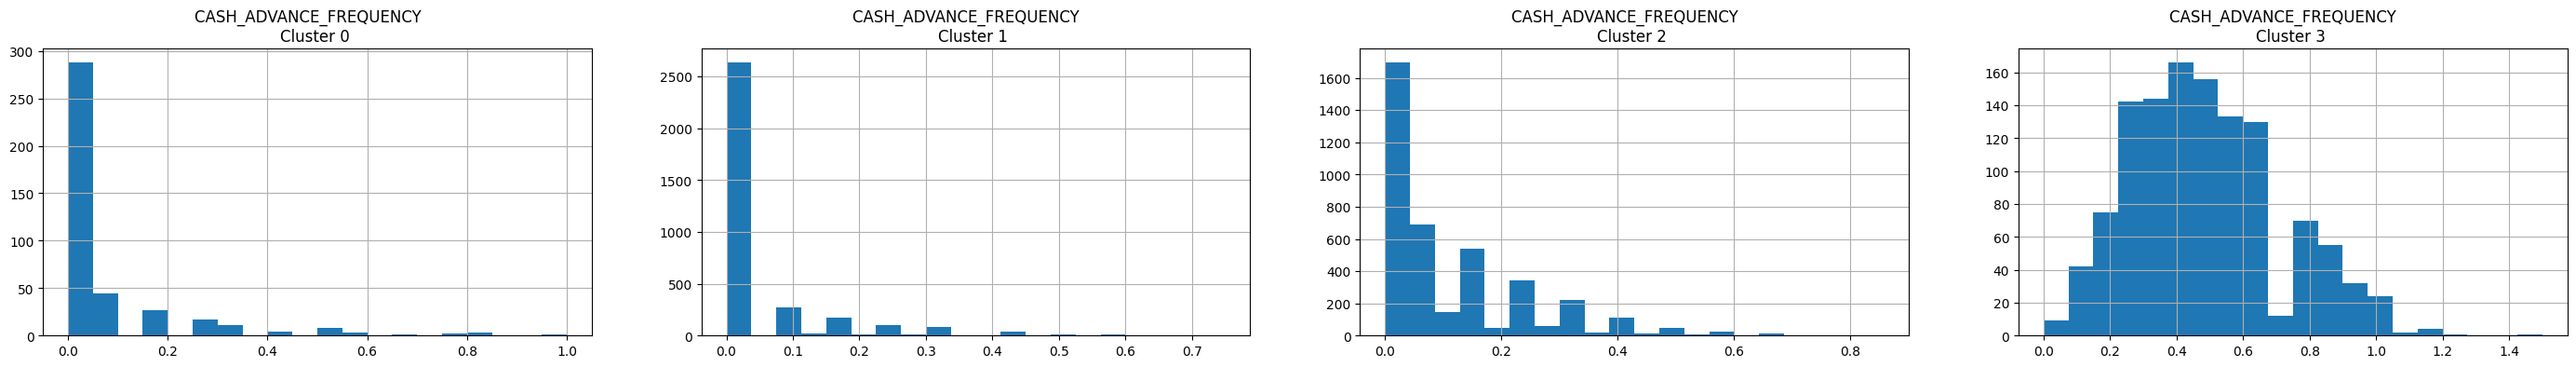

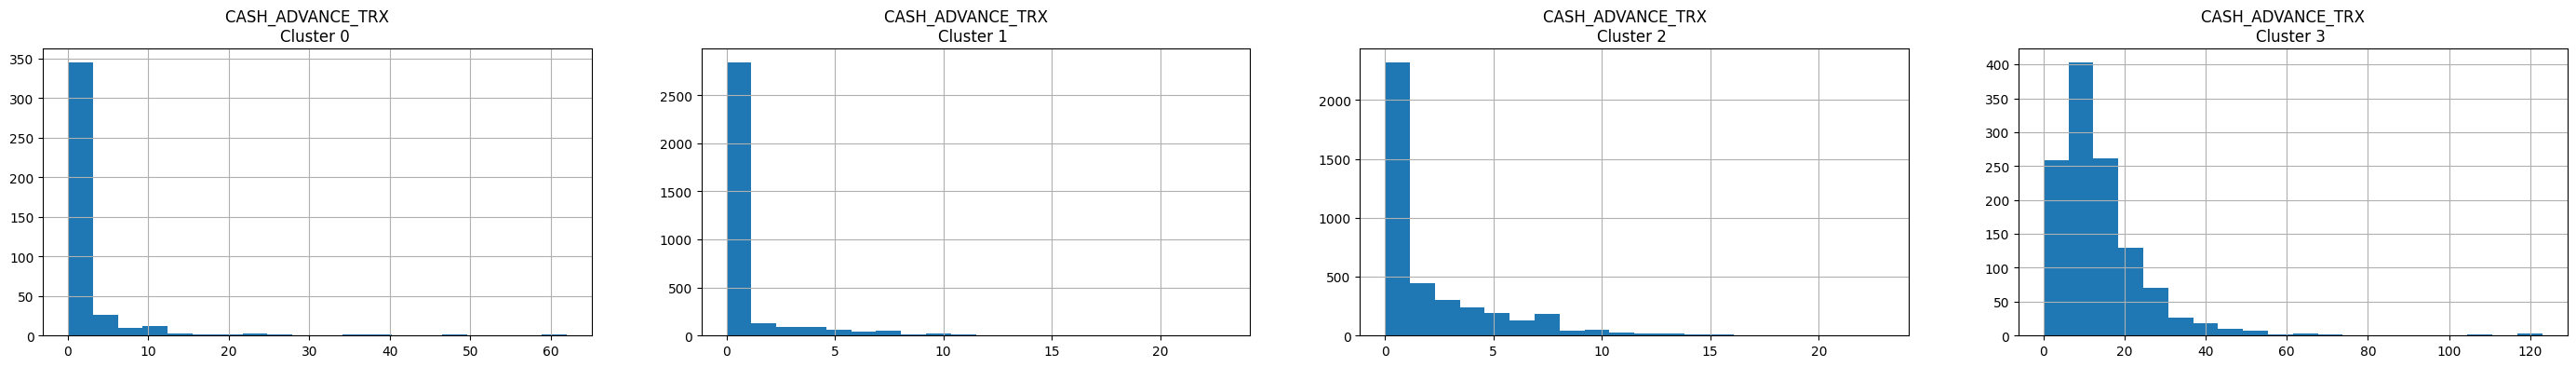

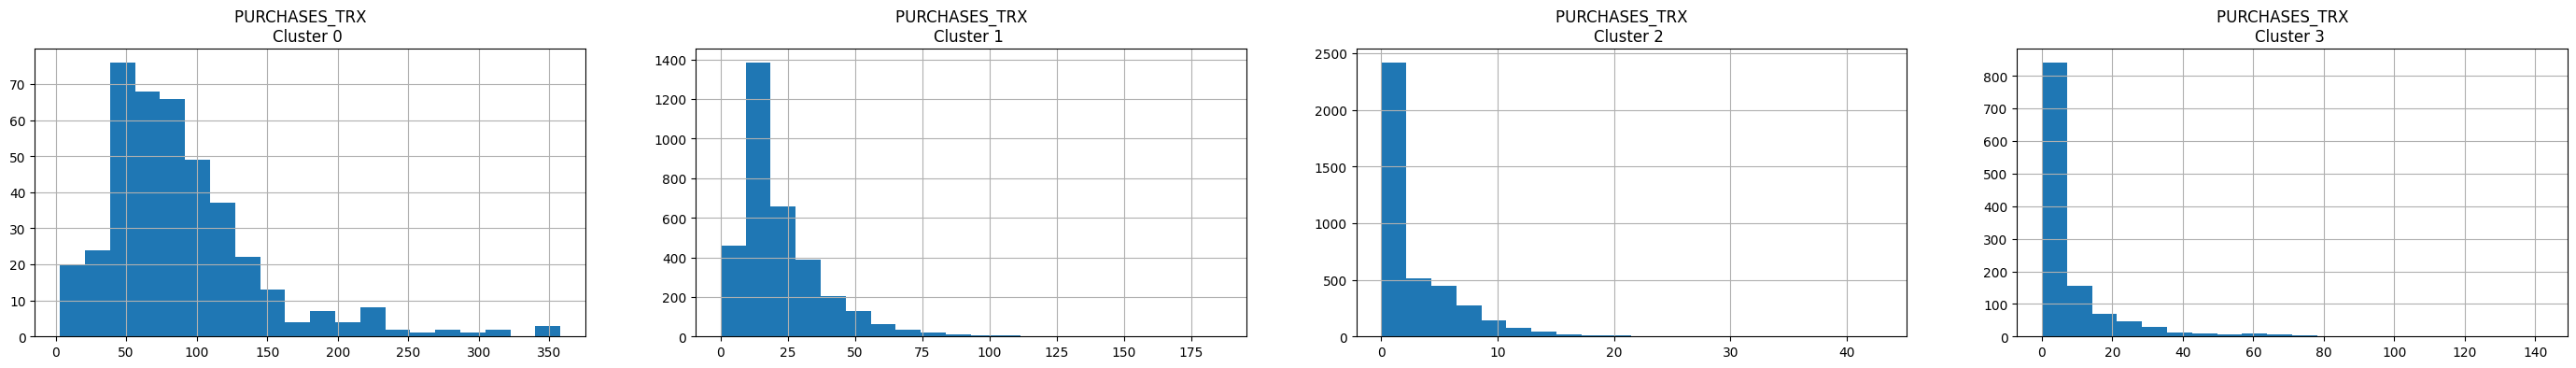

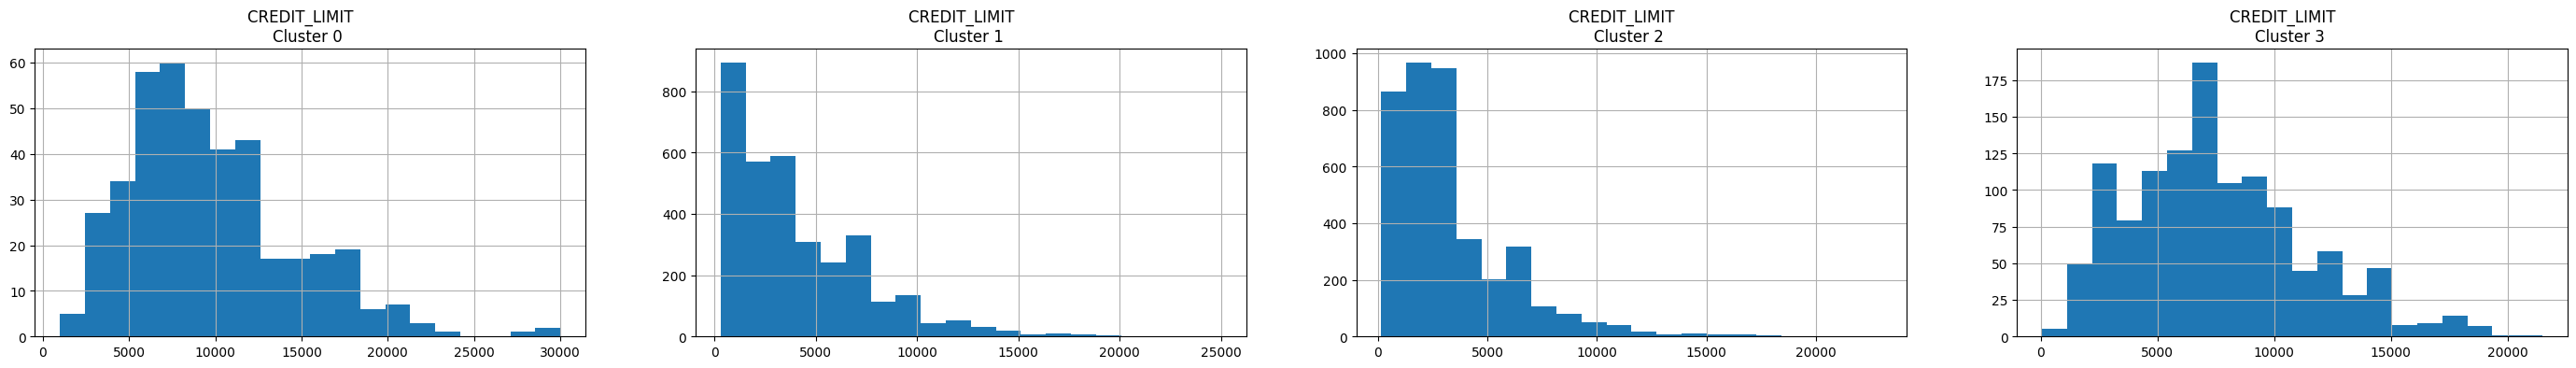

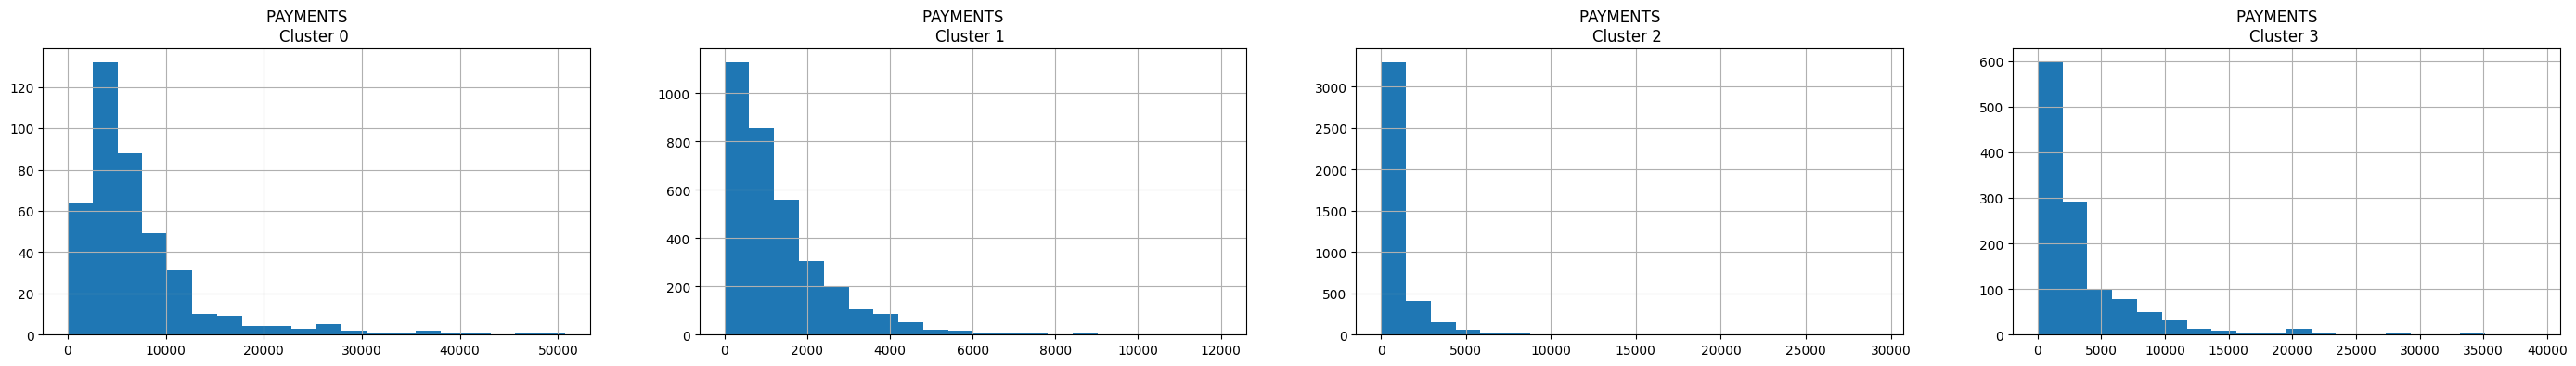

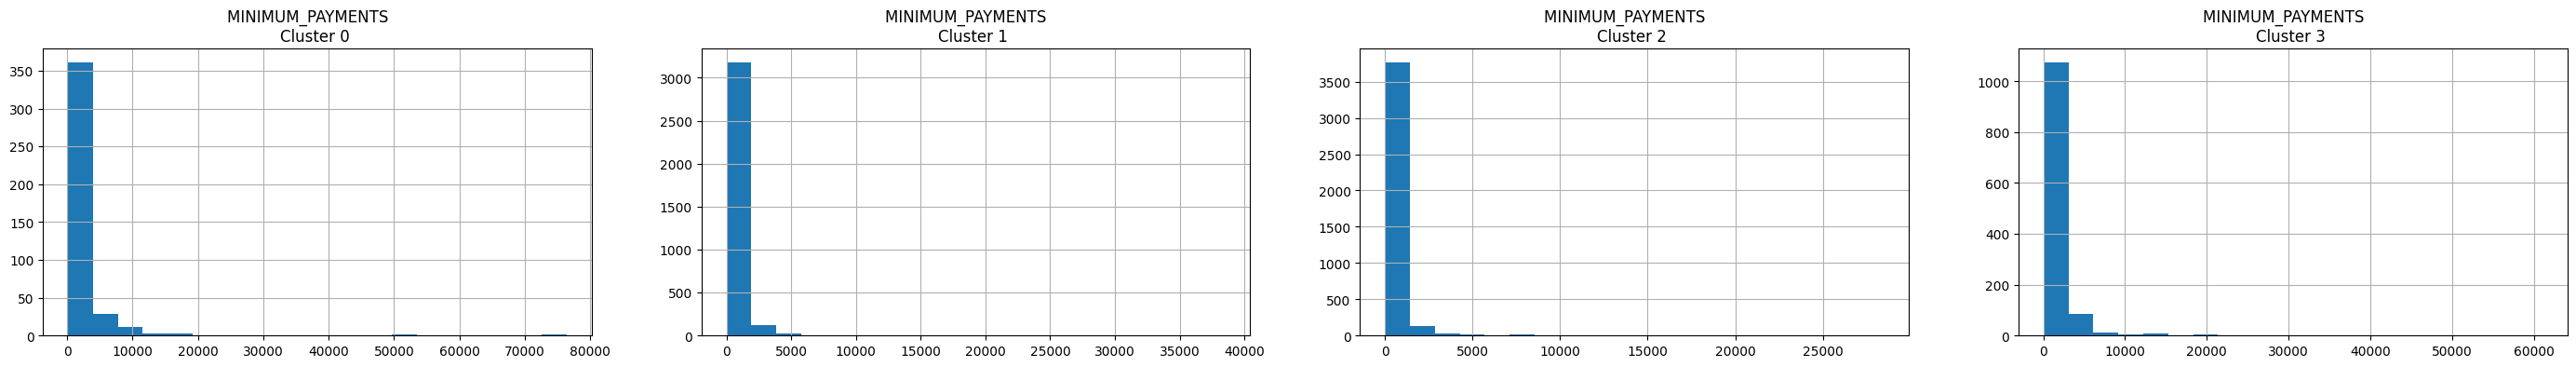

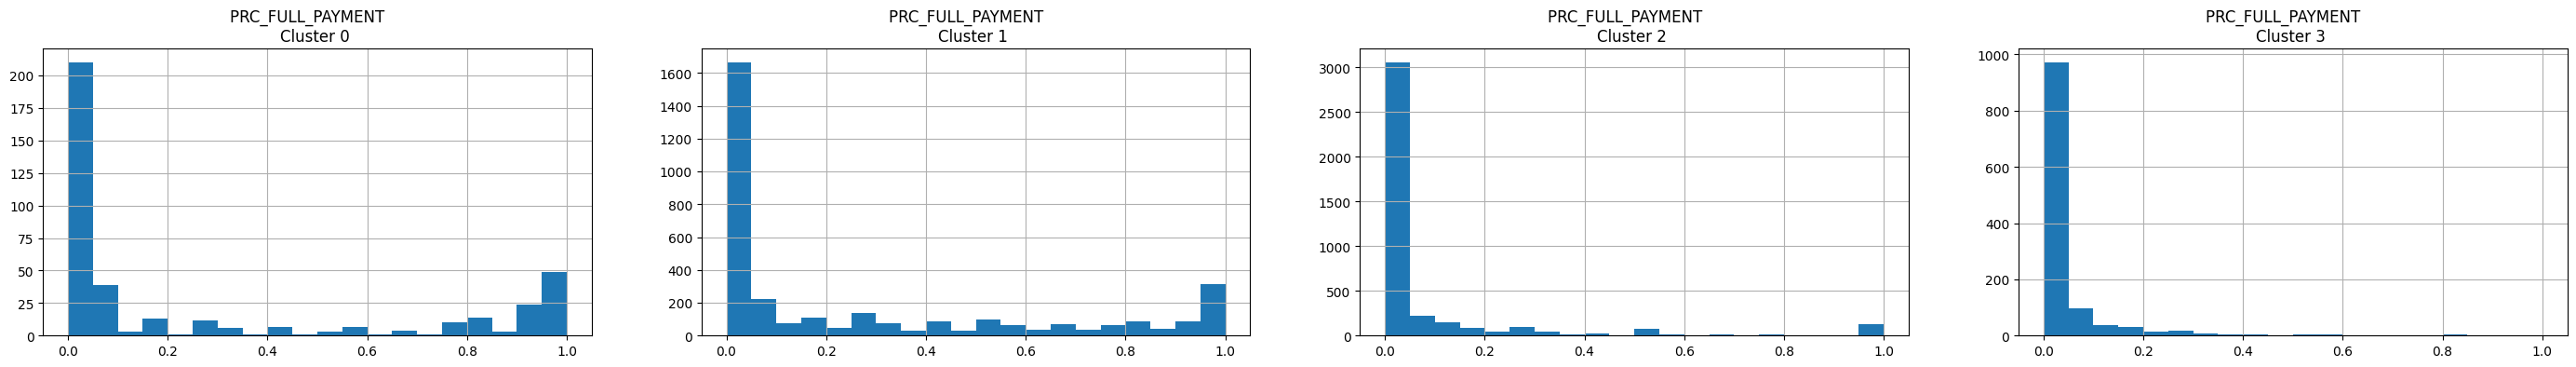

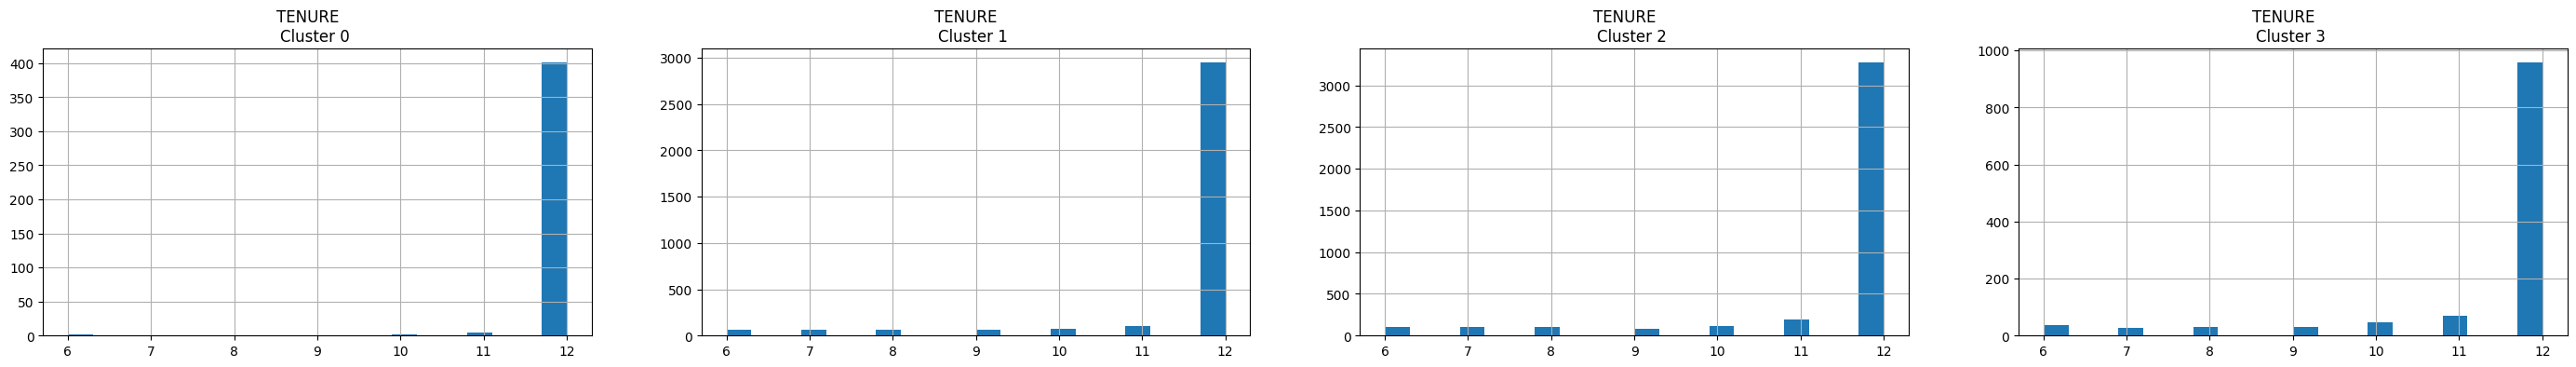

In [190]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35,4))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))

plt.show()

# PCA

In [186]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221933, -1.07644307],
       [-1.13829283,  2.50648613],
       [ 0.96968612, -0.38352643],
       ...,
       [-0.92620356, -1.81077965],
       [-2.33655339, -0.6579632 ],
       [-0.55642498, -0.4004865 ]])

In [187]:
# create 2 a dataframe called pc1 and 2
pca_df = pd.DataFrame(data = principal_comp, columns =['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.682219,-1.076443
1,-1.138293,2.506486
2,0.969686,-0.383526
3,-0.873626,0.043173
4,-1.599433,-0.688574
...,...,...
8945,-0.359629,-2.016140
8946,-0.564370,-1.639118
8947,-0.926204,-1.810780
8948,-2.336553,-0.657963


In [188]:
# concate the cluster label 

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,PCA1,PCA2,cluster
0,-1.682219,-1.076443,2
1,-1.138293,2.506486,3
2,0.969686,-0.383526,1
3,-0.873626,0.043173,2
4,-1.599433,-0.688574,2


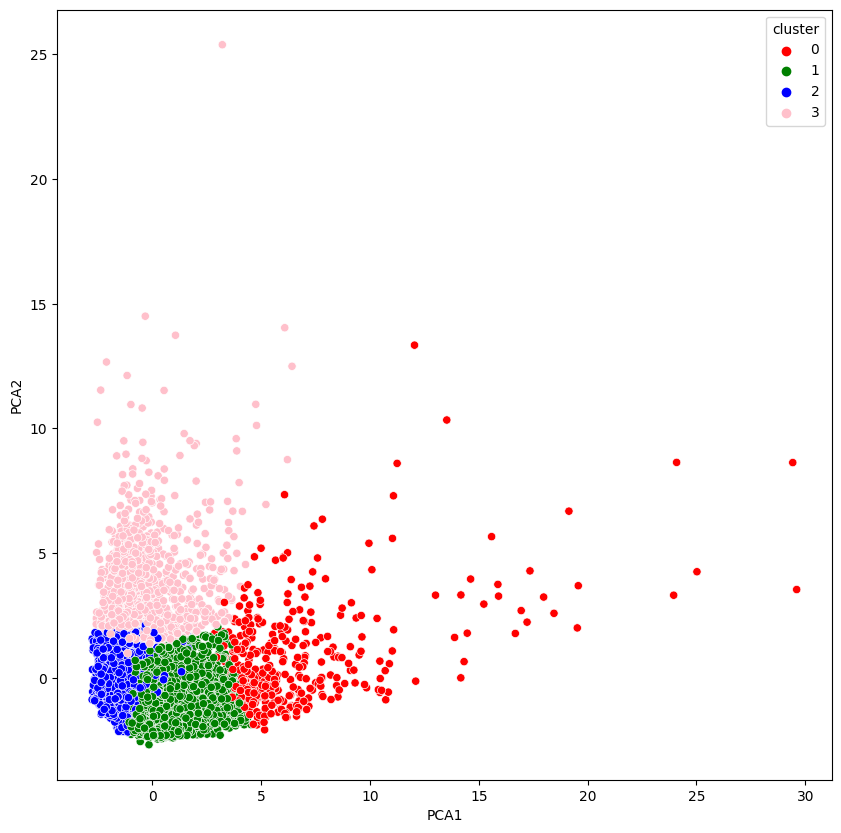

In [199]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
plt.show()

# 0 = Transcator
# 1 = New user
# 2 = VIP 
# 3 = Revovler
